## Support Vector Machines

### Import diabetes dataset and read the columns. Split the dataset into test and train. Scale it using MinMaxScaler

In [11]:
import numpy  as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
df=pd.read_csv('diabetes.csv')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_sc = pd.DataFrame(scaled, columns=df.columns)

In [16]:
X = df_sc.drop(['Outcome'], axis =1)
y = df_sc['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

### Train the model and find accuracy

In [18]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
prediction = svc.predict(X_test)

In [20]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.7635009310986964
0.7662337662337663


### Use hyperparameters for model tuning. Try with various values of C and kernel and find the best model. Use Grid search for this purpose. 

#### Try for C value 0.1, 0.5, 1, 5, 10
#### Try for kernels linear, rbf, poly, sigmoid
#### use cv=3

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [22]:
grid={"C":[0.1, 0.5, 1, 5, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [23]:
score = 'accuracy'

In [24]:
svc_cv = GridSearchCV(svc, grid, cv=3, n_jobs=1, scoring = score)

In [25]:
svc_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### Report your findings on the best model

In [26]:
##printing the optimum values of hyperparameters after the tuning process
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)

##printing the mean cross validated score of the best estimator 
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5, 'kernel': 'rbf'}
accuracy : 0.7746741154562383


#### Use the best params and classify test data and report the findings

In [27]:
predictions = svc_cv.predict(X_test)

In [28]:
accuracy_score(y_test, predictions)

0.7792207792207793

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
##printing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84       150
         1.0       0.76      0.54      0.63        81

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



## Recommendation systems - Collaborative filtering

#### About Book Crossing Dataset
This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0

#### Link to dataset files
http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

#### Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches

### Import all the necessary libraries and datasets

Import books.csv, users.csv, ratings.csv

Use ";" as separator while importing the datasets.

Use encoding='latin-1' and error_bad_lines=False while importing the datasets.

Example: df = pd.read_csv("df.csv", sep=";", error_bad_lines=False, encoding="latin-1")

books dataset columns - 'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'

users dataset columns - 'userID', 'Location', 'Age'

ratings dataset columns - 'userID', 'ISBN', 'bookRating'

Check shape of each dataset using shape function

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [35]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [36]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Drop last three columns containing image URLs which will not be required for analysis

In [37]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [38]:
#Dropping the last three columns
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [39]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### check the unique values of yearOfPublication

In [40]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.
Also some of the entries are strings and same years have been entered as numbers in some places

### Check the rows having 'DK Publishing Inc' and Gallimard as yearOfPublication and drop those rows

### Drop rows with yearOfPublication as 'Gallimard' and 'DK Publishing Inc'

In [41]:
#Finding the rows having 'DK Publishing Inc' as yearOfPublication

books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [42]:
#Dropping the above rows

books.drop([209538,221678],inplace=True)

In [43]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [44]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [45]:
#Dropping the above row

books.drop([220731],inplace=True)

In [46]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int32'

In [47]:
print(books.dtypes)

#Changing the datatype of yearOfPublication to 'int32'

books.yearOfPublication = books.yearOfPublication.astype(np.int32)
print(books.dtypes)

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object
ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object


### drop NaNs in 'publisher' column

In [48]:
#Finding null values in publisher column
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [49]:
#Dropping the above two NaN values

books.drop([128890,129037],inplace=True)

In [50]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Users dataset:

### List out the unique age values from age column

In [51]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

### Values below 5 and above 90 do not make much sense for our book rating case. Hence replace these by NaNs

In [52]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

### Replace null values with mean in Age column and  change datatype to int32

In [53]:
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [54]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


### Ratings dataset

Ratings dataset will have n_users*n_books entries.

In [55]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75669512590


### Ratings dataset should have books only which exist in our books dataset. Create a new dataset which has only ratings of books present in books dataset. Use ISBN column as common column. Hint: check isin()

In [56]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

### Check the old ratings and new ratings shape

In [57]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031130, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off

### Similarly, the ratings dataset should contain information only about users present in Users dataset. Filter out records of only those users present in users dataset from the ratings dataset. Use userID as the common column. Hint: check isin() 

In [58]:
ratings = ratings[ratings.userID.isin(users.userID)]

In [59]:
print(ratings.shape)
print(ratings_new.shape)

#No new users added

(1149780, 3)
(1031130, 3)


### Check unique book ratings

In [60]:
np.unique(ratings_new.bookRating)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Segregate dataset into two. One with only 0 ratings and the rest with other ratings.

In [61]:
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [62]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031130, 3)
(383839, 3)
(647291, 3)


### Plot the ratings data using countplot. Use bookRating in X axis

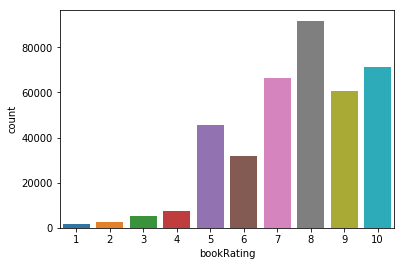

In [63]:
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()

### For more accurate results only consider users who have rated atleast 100 books

Take value counts of userId column into a separate Series or DF.

From ratings dataset having ratings 1 to 9, filter only rows for those users who have rated atleast 100 times.

Use isin.

example: 

df_cnt =  df.column.value_counts()

ratings_df = ratings_df[ratings_df.column.isin(df_cnt[df_cnt >=100].index)]

In [64]:
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

In [65]:
ratings_explicit['userID'].value_counts()

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
113270     104
164096     104
163804     104
183958     104
250405     104
35836      104
164323     103
2110       103
132492     103
235935     102
193898     102
76223      102
148966     102
10560      102
86189      102
117384     101
172888     101
66942      101
146113     101
224525     101
109901     101
33145      100
26544      100
169682     100
36609      100
211919     100
208406     100
36299      100
156300     100
95010      100
Name: userID, Length: 449, dtype: int64

### Generating ratings matrix from explicit ratings table

Since NaNs cannot be handled by training algorithms, replacing those by 0, which indicates absence of ratings.

Example.

ratings_matrix = ratingdf.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)

In [66]:
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import svds from scipy.sparse.linalg and pass the ratings matrix to it with k=50

Example: U, sigma, Vt = svds(ratings_matrix, k = 50)

Take only the diag value from sigma and do a dot product of the same with U. 

Do another dot product of the result with V. 

Assign the final resultant matrix to another new matrix. 

Convert this matrix to a dataframe with columns as that of the above ratings_matrix. The ratings_matrix was calculated above using the pivot() function of the dataframe.

In [67]:
from scipy.sparse.linalg import svds

In [68]:
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [69]:
x = np.dot(U,np.diag(sigma))

In [70]:
y = np.dot(x, Vt)

In [71]:
y_df = pd.DataFrame(y, index = userID, columns = ratings_matrix.columns)
y_df.index.name = 'userID'
print(y_df.shape)
y_df.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
2110,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2276,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
4017,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4385,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


### Take a particular user id - user id=2

In [72]:
#Print the user id associated with the second record in the dataframe
y_df.index[1]

2110

In [73]:
#sort the predictions of the user chosen into descending order from the predicted df above. 
#You will get a series. Hint: use iloc[user_id]
sorted_predictions = y_df.loc[2110].sort_values(ascending = False)
sorted_pred_df = pd.DataFrame(sorted_predictions, index = y_df.columns)
sorted_pred_df.head(2)

,2110
ISBN,
0000913154,-0.010012
0001046438,-0.003669


In [74]:
sorted_pred_df.rename(columns={2110: "User 2110"}, inplace = True)

### Get all books that this particular user has interacted with.

Hint: filter the ratings df associated with ratings 1 to 9 for this user id alone. Filter using the userID column and pass the userID obtained above from the ratings matrix.

Once the user_data is obtained, you will get a dataframe with userID = user ID value and ISBN and Ratings.

In [76]:
userdata = ratings_explicit[(ratings_explicit["userID"] == 2110)]
userdata.head(2)

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8


### Get the book data for this particular user. For this you need to filter using the ISBN column present in the above userdata dataframe

In [77]:
len(userdata["ISBN"].unique().tolist())

103

### Merge both the book data and user data as a single dataframe. Hint: Use merge function. 
#### Check how many books the user has rated. Hint: use shape

In [78]:
merged_df = pd.merge(sorted_pred_df, userdata, on = 'ISBN')
merged_df.head(2)

,ISBN,User 2110,userID,bookRating
0,0060987529,0.058987,2110,7
1,0064472779,0.009379,2110,8


In [79]:
merged_df.shape

(103, 4)

In [81]:
recommendations = (books[~books['ISBN'].isin(merged_df['ISBN'])]).merge(sorted_pred_df, on = 'ISBN')
recommendations.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User 2110
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.000883
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,-0.001017
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,0.002769
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,0.001838
4,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,0.000883


In [82]:
print(recommendations.shape)
recommendations.head()

(66469, 6)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User 2110
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.000883
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,-0.001017
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,0.002769
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,0.001838
4,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,0.000883


### Get top 10 recommendations for above given userID

#### Use Predictions column and sort the same as descending order

In [83]:
recommendations["User 2110"].sort_values(ascending = False)

655      0.368946
3221     0.333624
2845     0.333209
252      0.329336
1120     0.313295
2804     0.305088
1810     0.290587
539      0.278563
1319     0.250941
3150     0.249254
3268     0.242676
6185     0.239957
22820    0.239552
6186     0.239242
5487     0.234959
15       0.231819
5486     0.229402
2004     0.228038
1497     0.227935
2011     0.226968
30801    0.221496
33811    0.221496
2871     0.221396
5074     0.221054
5436     0.218949
4108     0.218348
12021    0.216858
4570     0.214561
1207     0.203758
5229     0.203748
           ...   
354     -0.042664
9656    -0.043207
15546   -0.043301
8415    -0.043553
24      -0.043825
17157   -0.044025
14925   -0.044076
24695   -0.044668
8416    -0.044738
6787    -0.047424
5482    -0.047690
2988    -0.047838
9594    -0.048401
24613   -0.048595
24708   -0.048595
113     -0.048595
4803    -0.048705
3595    -0.049460
4255    -0.050022
1385    -0.050099
3922    -0.052753
17644   -0.052800
35589   -0.053489
24557   -0.054608
335     -0